<a href="https://colab.research.google.com/github/knownbymanoj/Machine_Learning/blob/main/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory

In this first part, we are going to see some useful techniques that are commonly used when training a Neural Network. \
We start by creating a dataset.

In [1]:
from sklearn.datasets import load_wine #load our target dataset
from sklearn.model_selection import train_test_split
import numpy as np

#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size = 0.9, random_state = 123) 

We then create a MLP, as we did in the Keras ipynb file.

In [2]:
import tensorflow #the backend used by Keras (there are different beckend)
from tensorflow.keras.models import Sequential #import the type of mdel: sequential (e.g., MLP)
from tensorflow.keras.layers import Input, Dense #simple linear layer
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
import matplotlib.pyplot as plt

In [3]:
# Configuration options
#see the number of labels
labels = set(y_train)
print(labels, len(labels))

# Configuration options
feature_vector_length = X.shape[1] #how many features
num_classes = len(labels) #how many classes

{0, 1, 2} 3


In [4]:
#convert to one-hot encoding representation the ground truth
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 3)                 42        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________
None


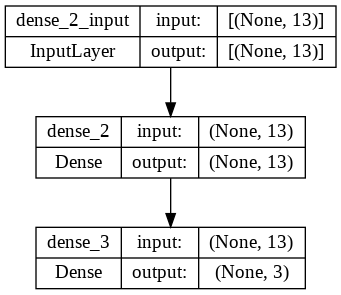

In [6]:
#add these two lines when you define a new model
np.random.seed(123)
set_random_seed(2)

model = Sequential() #we first define how the "model" looks like
model.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model.add(Dense(num_classes, activation='softmax')) #output layer
print(model.summary())
plot_model(model, show_shapes= True)

We now train our model. \
During our training, we use several *epochs*, meaning that our model saw more times the same training samples. 

When using more epochs, it is important to look at the training curve, i.e., we print the loss (or accuracy) of both training and validation at the varying of the epochs. 

This plot can tell us a lot about the trained model, such as:


1.   Is there any underfitting / overfitting problem?
2.   How is then training curve shape? 


In [7]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric


#fit
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/5
15/15 [==============================] - 1s 12ms/step - loss: 6.3676 - accuracy: 0.3596 - val_loss: 1.0926 - val_accuracy: 0.6154
Epoch 2/5
15/15 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.4298 - val_loss: 1.0843 - val_accuracy: 0.6154
Epoch 3/5
15/15 [==============================] - 0s 2ms/step - loss: 1.0922 - accuracy: 0.4298 - val_loss: 1.0755 - val_accuracy: 0.6154
Epoch 4/5
15/15 [==============================] - 0s 2ms/step - loss: 1.0891 - accuracy: 0.4298 - val_loss: 1.0703 - val_accuracy: 0.6154
Epoch 5/5
15/15 [==============================] - 0s 2ms/step - loss: 1.0871 - accuracy: 0.4298 - val_loss: 1.0636 - val_accuracy: 0.6154


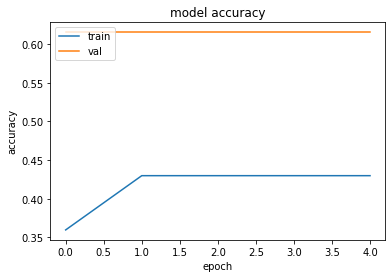

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

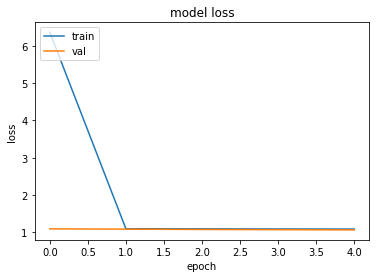

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

This is kind of a toy-sh dataset. /
Here, we see a clear pattern of the loss error: a rapid decreasing after the second epoch, and then the model already reached an equilibrium on its loss, i.e.g., the model does not improve its performance.
 

It is thus important to ask, how many epochs should we use? 
For example, right now we see that 2 epochs are enough. 
However, we trained our model for 5 epochs more. 
In this case, this was not time consuming, since each epoch took ~$1 ms$.
This might not be acceptable in more challenging task, where one epoch might least 1h, 1d, or even 1 week. 
We can save our time by introducing an **early stopping mechanism**. 
For example, during the training, if the model validation loss does not improve 
for 3 epochs, we decide to stop. 
In this way, we can even set the number of epochs to 10000. 


<a href = "https://keras.io/api/callbacks/early_stopping/"> [link] </a>

In [10]:
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)

np.random.seed(123)
set_random_seed(2)

model2 = Sequential() #we first define how the "model" looks like
model2.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model2.add(Dense(num_classes, activation='softmax')) #output layer

# Configure the model and start training
model2.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric


history2 = model2.fit(X_train, y_train_cat, epochs=500, batch_size=16, verbose=0, validation_split=0.1, callbacks=[es])

Epoch 58: early stopping


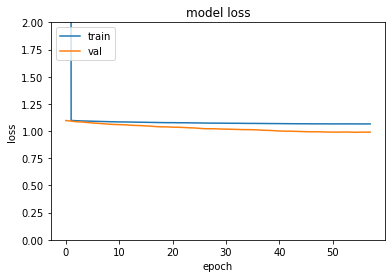

In [11]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0, 2)
plt.show()

# Exercise 1

We start by creating a dataset. 

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

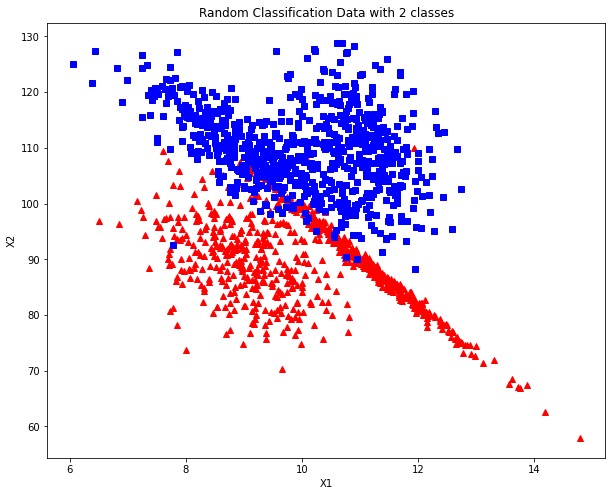

In [12]:
from sklearn import datasets
import numpy as np
np.random.seed(123)
X, y = datasets.make_classification(n_samples=1500, n_features=2, random_state=123, n_redundant= 0, scale=10, shift=10)
X[:, 0] = X[:, 0]*0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)


#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

## Ex1.1

Create a MLP called $model_1$ with two layers:

1.   one hidden layer with 5 neurons and relu as activation function. 
2.   one output layer with softmax activation.

Then, train it for 5 epochs, batch size = 16, and a validation set of 25%. 


In [ ]:
## EX1.1 HERE

In [13]:
#--------SOLUTIONS

# Configuration options
feature_vector_length = 2 #how many features
num_classes = 2 #how many classes

#categorization
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

#seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model = Sequential() #we first define how the "model" looks like
model.add(Dense(input_dim = feature_vector_length, units=5 , activation='relu')) #input layer
model.add(Dense(units = num_classes, activation='softmax')) #output layer

#see how the model looks like
print(model.summary())

# Configure the model and start training
model.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=16, verbose=1, validation_split=0.25)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
57/57 [==============================] - 0s 3ms/step - loss: 2.5229 - accuracy: 0.6100 - val_loss: 0.5740 - val_accuracy: 0.7200
Epoch 2/5
57/57 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6567 - val_loss: 1.1303 - val_accuracy: 0.4767
Epoch 3/5
57/57 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6389 - val_loss: 0.5464 - val_accuracy: 0.7467
Epoch 4/5
57/57 [===============

# Ex 1.2

Plot both accuracy and loss curves 

Answer the following:

1.   Is there any underfitting / overfitting problem?
2.   How is then training curve shape? 



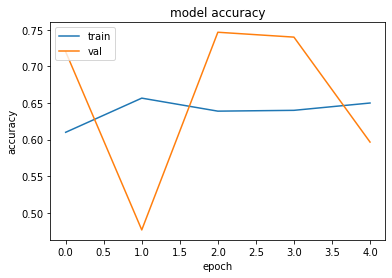

In [14]:
#--------SOLUTIONS

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

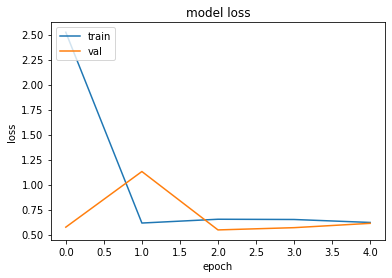

In [15]:
#--------SOLUTIONS

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The loss curve tells us that the training improves only up to two epochs, but the validation accuracy, and to less extent the validation loss, is unstable. 

Let's see if we can improve the model in the next exercise. 

### Ex1.3

We move temporarily into an important aspect: *knowing our data*.
As we introduced in our last lesson, the goal of a good data scientist is not only to provide a good training model, but he / she needs to learn the data we are experimenting with. </br>
When working with a dataset, try to answer to the following:


1.   Is the ground truth balanced among the classes? In case of an unbalanced dataset, we need to be more careful on how we compute the performance. 
2.   What are the properties of the input features? For each feature, you can understand the following: i) is it defined in the discrete or continuous domain? if defined in the continous domain, How is it distributed? For example, print the minimum and maximum values for each feature.

Based on the answers, we can "improve" our training strategy. 




In [16]:
#----------SOLUTION
#balance / unbalance
from collections import Counter

Counter(y)


Counter({0: 749, 1: 751})

The ground truth is completely balanced. Let's see how the features looks like. 

In [ ]:
#----------SOLUTION
#we can first get the min / max of each feature
print(X.min(axis = 0))
print(X.max(axis = 0))
print(X.mean(axis = 0 ))

[ 6.04904277 57.90438737]
[ 14.78715639 128.88776401]
[10.02516962 99.74419228]


Ok, the two features are defined on different ranges. This might be an issue since we are using a gradient-descent-based algorithm to train our model. 
Therefore the optimization might not be efficient when the features are not defined in the same range, since the we are using one learning rate to control the updates along features on different ranges.  


### Ex 1.4

We can try to now improve our model by scaling the features. Use a standard scaler to scale $X_{train}$ and $X_{test}$, create a new MLP $model_2$ and train it with the same configurations (architecture, training strategy) as done  for $model_1$. 

Then we'll do some plots to check the accuracy and loss of the latest model and finally compare it with the previous one (see below for details)


In [17]:
#----------SOLUTION
from sklearn.preprocessing import StandardScaler 

#define a scaler
scaler = StandardScaler()
scaler.fit(X_train) #remember, always training! 
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)



#seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model2 = Sequential() #we first define how the "model" looks like
model2.add(Dense(input_dim = feature_vector_length, units=5 , activation='relu')) #input layer
model2.add(Dense(num_classes, activation='softmax')) #output layer

# Configure the model and start training
model2.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history2 = model2.fit(X_train_scl, y_train_cat, epochs=5, batch_size=16, verbose=1, validation_split=0.25)

Epoch 1/5
57/57 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8422 - val_loss: 0.4406 - val_accuracy: 0.9000
Epoch 2/5
57/57 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.9400 - val_loss: 0.3930 - val_accuracy: 0.9400
Epoch 3/5
57/57 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.9411 - val_loss: 0.3527 - val_accuracy: 0.9400
Epoch 4/5
57/57 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.9367 - val_loss: 0.3197 - val_accuracy: 0.9367
Epoch 5/5
57/57 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.9367 - val_loss: 0.2936 - val_accuracy: 0.9367


Our second model gained a large improvement in the validation accuracy, which is not bad at all given that we just did a simple preprocessing. \
But let us plot the accuracy on train and validation of our latest model with respect to the number of epochs. 

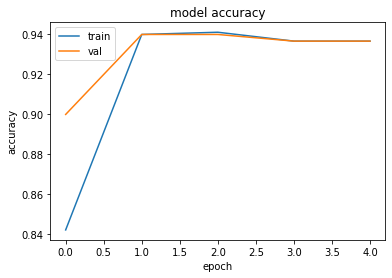

In [18]:
#----------SOLUTION
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

Let's now plot the loss of our latest model on the train and validation sets. 

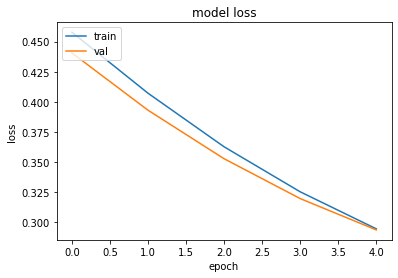

In [19]:
#----------SOLUTION
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

Let's now compare the performance of the two models on the validation set. 

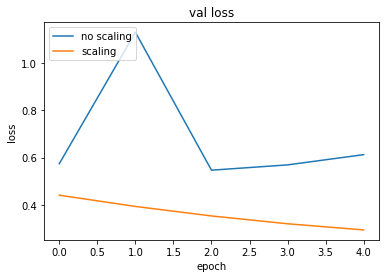

In [20]:
#----------SOLUTION
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['no scaling', 'scaling'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

The accuracy scores improve "regularly" using the scaled dataset. \
As we noticed in the original training, the model can still learn by increasing the number of epochs. \

# Ex1.5

Let's do it. \
For example, we can train a new MLP $model_3$ for 50 epochs. 
Print loss and accuracy curves, and then visually analyze them. \
Again, use the same configuration as $model_1$.


In [21]:
#----------SOLUTION

#seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model3 = Sequential() #we first define how the "model" looks like
model3.add(Dense(input_dim = feature_vector_length, units=5 , activation='relu')) #input layer
model3.add(Dense(num_classes, activation='softmax')) #output layer

#see how the model looks like
print(model3.summary())

# Configure the model and start training
model3.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history3 = model3.fit(X_train_scl, y_train_cat, epochs=50, batch_size=16, verbose=1, validation_split=0.25)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 15        
                                                                 
 dense_11 (Dense)            (None, 2)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8422 - val_loss: 0.4406 - val_accuracy: 0.9000
Epoch 2/50
57/57 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.9400 - val_loss: 0.3930 - val_accuracy: 0.9400
Epoch 3/50
57/57 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.9411 - val_loss: 0.3527 - val_accuracy: 0.9400
Epoch 4/50
57/57 [===========

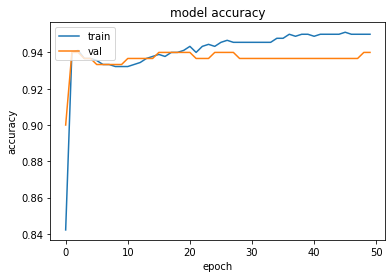

In [22]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

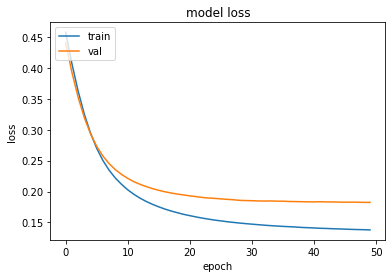

In [23]:
# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

The charts show some common training trends. For example, let's consider the loss:


1.   In the early stages (epoch 1 - 20), there is a phase where the model performance improve quickly. 
3.   After epoch 20, the loss does not improve much, and the loss decreases very slowly.

### Ex1.6

Define a fourth MLP $model_4$ with the early stopping mechanism with patience = 3. Use the same configuration of $model_1$.
Train the model for 500 epochs, and then plot the accuracy and loss curves.



In [24]:
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)

#seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model4 = Sequential() #we first define how the "model" looks like
model4.add(Dense(input_dim = feature_vector_length, units=5 , activation='relu')) #input layer
model4.add(Dense(num_classes, activation='softmax')) #output layer

#see how the model looks like
print(model4.summary())

# Configure the model and start training
model4.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history4 = model4.fit(X_train_scl, y_train_cat, epochs=500, batch_size=16, verbose=0, validation_split=0.25, callbacks=[es])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 15        
                                                                 
 dense_13 (Dense)            (None, 2)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None
Epoch 54: early stopping


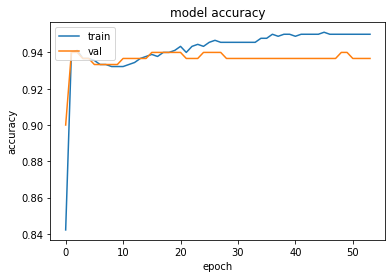

In [25]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

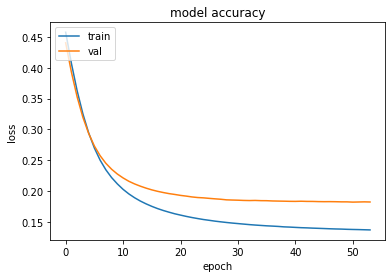

In [26]:
# summarize history for accuracy
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

We see that the model stopped at epoch 54. </br>

### Ex 1.6 

We created so far $4$ models, with four different training strategy, but the same MLP structure. \

We can now see what it would happen on the "real" life, i.e., if the fourth model is actually the best on the testing set as well. 
Remember: the fourth seems the best based on the validation accuracy and loss.

In [27]:
#see the testing performance of 
test_results = model.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

#see the testing performance
test_results = model2.evaluate(X_test_scl, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

#see the testing performance
test_results = model3.evaluate(X_test_scl, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

#see the testing performance
test_results = model4.evaluate(X_test_scl, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

10/10 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.5400
Test results - Loss: 0.6544205546379089 - Accuracy: 0.5400000214576721%
10/10 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.9100
Test results - Loss: 0.29541707038879395 - Accuracy: 0.9100000262260437%
10/10 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.9433
Test results - Loss: 0.15758024156093597 - Accuracy: 0.9433333277702332%
10/10 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9433
Test results - Loss: 0.1564946472644806 - Accuracy: 0.9433333277702332%


### Ex1.7 

So far, when we defined a new model, we always "repeated" a set of instructions, like model definition (i.e., Sequential, add Dense layers, compile). \

It's time to speed-up this process. 
Create a function that, given the number of layers, creates a MLP (i.e. the "compiled" model). 
Here, we set the number of neurons to 2 for all hidden layers, and activation function as relu. The output layer's number of neurons depend on the number of classes we use, while the activation function is a softmax. 

In [28]:
#def MLP_definer(n_layers, input_size, n_classes):  

In [29]:
#------SOLUTIONS

def MLP_definer(n_layers, input_size, n_classes):
    #seed
    np.random.seed(123)
    set_random_seed(2)
    
    #define a sequential model
    model = Sequential()

    #define the first layer 
    for i in range(n_layers):
        if i == 1: #input layer
            model.add(Dense(units = 2, input_dim = input_size, activation='relu'))
        else:
            model.add(Dense(units = 2, activation = 'relu'))

    model.add(Dense(units = n_classes, activation= 'softmax'))


    # Configure the model and start training
    model.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

    return model

In [30]:
#------SOLUTIONS

def MLP_definer2(n_layers, input_size, n_classes):
    #seed
    np.random.seed(123)
    set_random_seed(2)
    
    #define a sequential model
    model = Sequential()

    if n_layers == 0:
        model.add(Dense(input_dim= input_size, units = n_classes, activation= 'softmax'))
    else:
        #define the first layer 
        for i in range(n_layers):
            if i == 0: #input layer
                model.add(Dense(units = 2, input_dim = input_size, activation='relu'))
            else:
                model.add(Dense(units = 2, activation = 'relu'))

    model.add(Dense(units = n_classes, activation= 'softmax'))

    # Configure the model and start training
    model.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

    return model

# Ex 1.8 

Let's now consider the number of layers (not counting the input and output ones) of the network as a hyperparameter. 

Using the function you just defined in the previous exercise, implement a grid-search among different number of layers (from 0 to 4). \
Remember to use the earlystopping mechanism. \
Print both training and validation accuracies.

In [33]:
#-------SOLUTIONS

nlayers = [0, 1, 2, 3, 4]

for nl in nlayers:
    #create the MLP
    m = MLP_definer2(n_layers= nl, input_size=2, n_classes= 2)
    print(m.summary())

#train our model
h = m.fit(X_train_scl, y_train_cat, epochs=500, 
                  batch_size=16, verbose=0, validation_split=0.25, 
                  callbacks=[es])
    
print(f"N layers:{nl}\t\tTrain ACC:{h.history['accuracy'][-1]:.8f}\tVal ACC:{h.history['val_accuracy'][-1]:.8f}")
    
print("\n\n\n\n")

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 6         
                                                                 
 dense_31 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 2)                 6         
                                                                 
 dense_33 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable pa